# Decision Tree Classification
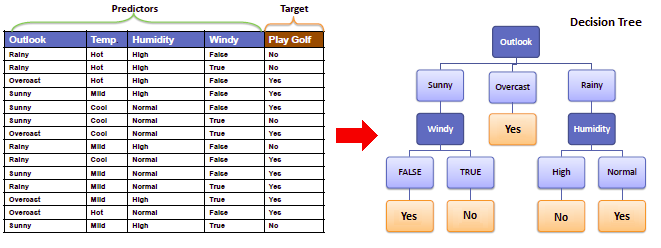

# Selection of attributes - What has more significance?

Here is an example table. We will calculate GINI INDEX values for our features

What is Gini Index?

Gini index or Gini impurity measures the degree or probability of a particular variable being wrongly classified when it is randomly chosen. But what is actually meant by ‘impurity’? If all the elements belong to a single class, then it can be called pure. The degree of Gini index varies between 0 and 1, where 0 denotes that all elements belong to a certain class or if there exists only one class, and 1 denotes that the elements are randomly distributed across various classes. A Gini Index of 0.5 denotes equally distributed elements into some classes.

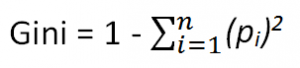
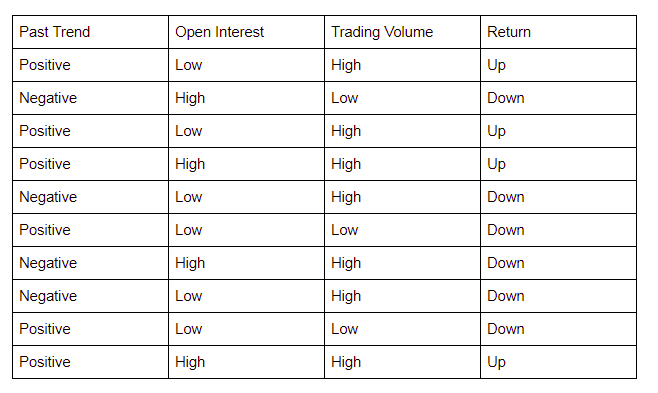

# Let’s start by calculating the Gini Index for ‘Past Trend’.

P(Past Trend=Positive): 6/10

P(Past Trend=Negative): 4/10

If (Past Trend = Positive & Return = Up), probability = 4/6

If (Past Trend = Positive & Return = Down), probability = 2/6

Gini index = 1 - ((4/6)^2 + (2/6)^2) = 0.45
###################################
If (Past Trend = Negative & Return = Up), probability = 0

If (Past Trend = Negative & Return = Down), probability = 4/4

Gini index = 1 - ((0)^2 + (4/4)^2) = 0

Weighted sum of the Gini Indices can be calculated as follows:

Gini Index for Past Trend = (6/10)0.45 + (4/10)0 = 0.27

                                        # With similar calculations, we get
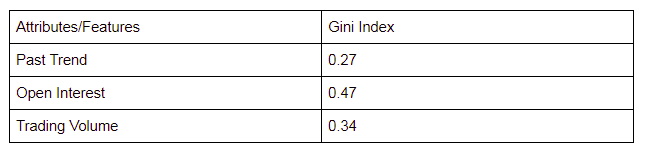
                                        So our preferred attribute for the root node will be: Past Trend

# In the next step, splitting will be on the basis of past trend categories

Let us use Decison tree for classification of Loan Application as Yes or No based on credit risk

In [1]:
#self employed 0 - no 1 -yes
#married 0 - no 1 -yes
#Education 0- Not graduate, 1 - Graduate
#Gender 0- Male , 1-Female
#Loan Status - 0 No , 1 - Yes
#property_Area 1- Urban, 2 Semi-Urban 3 - Rural

In [2]:
import pandas as pd
import seaborn as sns

df=pd.read_csv("./datasets/Loan_Status_Classification.csv")

In [3]:
#samples 


df.sample(  5  )

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
203,0,1,0,1,1,39147,4750,120,360,1,2,1
158,0,0,0,1,0,6277,0,118,360,0,3,0
23,0,0,0,1,0,4166,0,98,360,0,2,0
6,0,1,3,1,0,4333,1811,160,360,0,1,1
257,0,0,0,1,0,5417,0,168,360,1,1,1


In [4]:
#number of missing values


df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [5]:
df.shape

(298, 12)

In [6]:
#data bias


df['Loan_Status'].value_counts(normalize=True)

1    0.503356
0    0.496644
Name: Loan_Status, dtype: float64

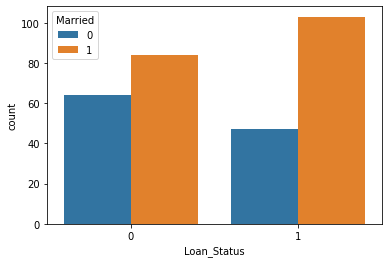

In [7]:
#how loan status is affected by marital status?
sns.countplot(x='Loan_Status',data=df,hue='Married')

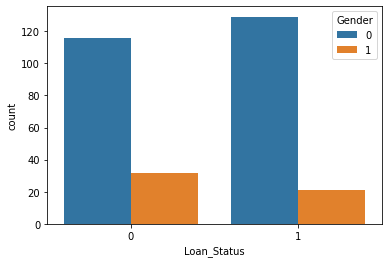

In [8]:
#how loan status is affected by Gender?
sns.countplot(x='Loan_Status',data=df,hue='Gender')

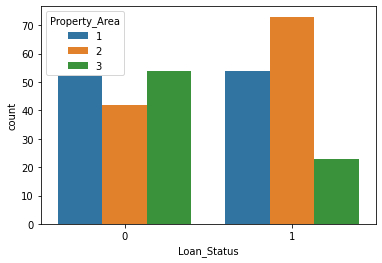

In [9]:
#how loan status is affected by Property area?
sns.countplot(x='Loan_Status',data=df,hue='Property_Area')

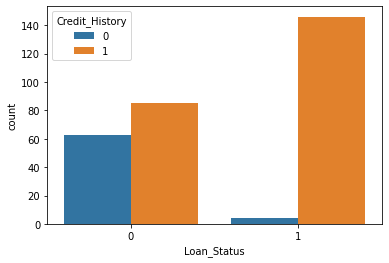

In [10]:
sns.countplot(x='Loan_Status',data=df,hue='Credit_History')

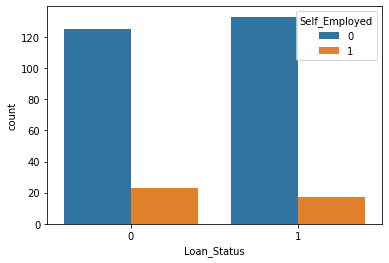

In [11]:
#how loan status is affected by Self_Employed?
sns.countplot(x='Loan_Status',data=df,hue='Self_Employed')

In [12]:
#2 points

features=df.loc[ : , df.columns!="Loan_Status"] #best contributors!
label=df[['Loan_Status']]

In [13]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(features,label,test_size=0.2)

In [14]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier() #Decision Tree

In [15]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [16]:
model.score(x_test,y_test)

0.65

In [17]:
ans=model.predict(x_test)
ans

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0])

In [18]:
predicted=pd.DataFrame(ans)
predicted.head(5)

,0
0,0
1,0
2,0
3,1
4,1


In [19]:
actual_test=pd.DataFrame(y_test).reset_index(drop=True)
actual_test.head(5)

,Loan_Status
0,0
1,0
2,1
3,0
4,0


In [20]:
pd.concat([predicted,actual_test],axis=1).sample(5)

,0,Loan_Status
56,1,0
49,1,0
0,0,0
6,1,1
23,0,0


In [21]:
from sklearn.metrics import accuracy_score

accuracy_score(actual_test,predicted)

0.65

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(actual_test,predicted)

array([[23, 10],
       [11, 16]])

# Splitting Criteria may also be Information Gain

Refer to this link for an example on how Information Gain is calculated 
https://www.saedsayad.com/decision_tree.htm

In [ ]:
3 decision tree : 100 features


row number 30:

BAGGING IN ML

Decision Tree 1: 5 levels max depth : YES

Decision Tree 1: 6 levels max depth : NO

Decision Tree 1: 10 levels max depth : YES

2 approaches (Boosting & bagging) to using an ensemble of models (homogeneous)


1) Ask multiple models for a data point. Go with majority (Bagging. e.g Random Forest)


2) Make a model. Accept accurate results and send cases of inaccurate results
    to a new model tuned slightly differently (Boosting. e.g XGBOOST)

    kaggle.com